<h1><center>CMPE 462 - Project 3 <br>Implementing K-Means & PCA<br>Due: June 14, 2020, 23:59</center></h1>

# Task 1: K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('data.npy')
labels = np.load('label.npy')

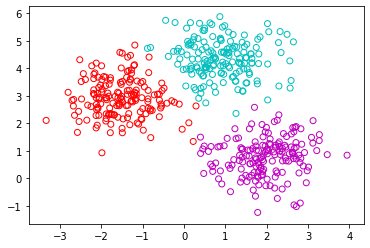

In [3]:
colors = ['c', 'm', 'r']
for i in range(3):
    plt.scatter(data[np.where(labels[:] == i), 0], data[np.where(labels[:] == i), 1], 
                marker='o', facecolors='none', edgecolors=colors[i])
plt.show()

In [4]:
k = 3
iters = 10

**Initial centroids:**

In [5]:
np.random.seed(1)
x1 = np.random.uniform(np.min(data[:, 0]), np.max(data[:, 0]), k)
x2 = np.random.uniform(np.min(data[:, 1]), np.max(data[:, 1]), k)
centroids = {}
for i in range(k):
    centroids[i] = np.array([x1[i], x2[i]])

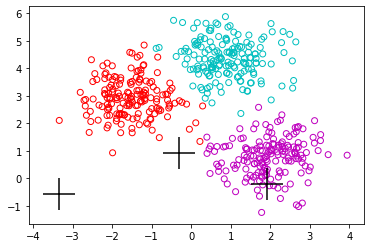

In [6]:
for i in range(3):
    plt.scatter(data[np.where(labels[:] == i), 0], data[np.where(labels[:] == i), 1], 
                marker='o', facecolors='none', edgecolors=colors[i])
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker='+', c='k', s=1000)
plt.show()

**K-means algorithm:**

In [7]:
for i in range(iters):
    memberships = {}
    for j in range(k):
        memberships[j] = []
    for point in data:
        distances = [np.linalg.norm(point - centroids[centroid]) for centroid in centroids]
        membership = distances.index(min(distances))
        memberships[membership].append(point)
    for membership in range(k):
        centroids[membership] = np.average(memberships[membership], axis=0)

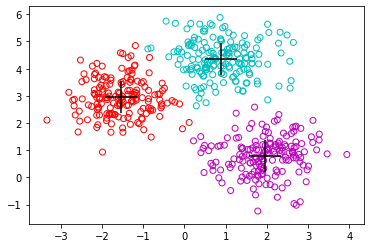

In [8]:
for membership in memberships:
    color = colors[membership]
    for point in memberships[membership]:
        plt.scatter(point[0], point[1], marker='o', facecolors='none', edgecolors=color)
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker='+', c='k', s=1000)
plt.show()

In [9]:
k = 3
iters = range(1, 10)

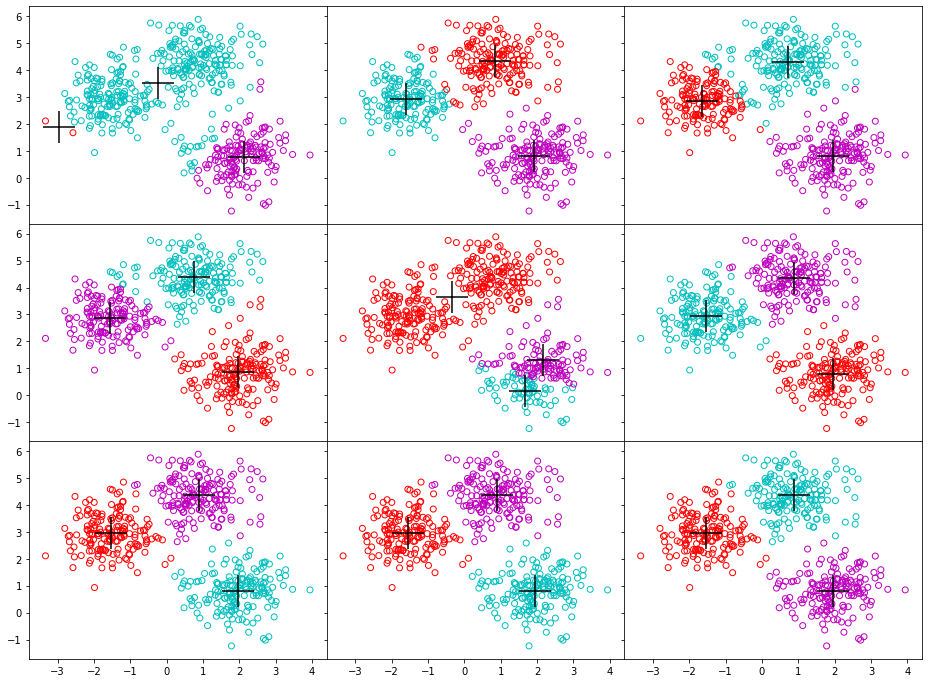

In [10]:
fig, axs = plt.subplots(3, 3, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(16, 12))
np.random.seed(1)
for z in iters:
    x1 = np.random.uniform(np.min(data[:, 0]), np.max(data[:, 0]), k)
    x2 = np.random.uniform(np.min(data[:, 1]), np.max(data[:, 1]), k)
    centroids = {}
    for i in range(k):
        centroids[i] = np.array([x1[i], x2[i]])
    for i in range(iters[z-1]):
        memberships = {}
        for j in range(k):
            memberships[j] = []
        for point in data:
            distances = [np.linalg.norm(point - centroids[centroid]) for centroid in centroids]
            membership = distances.index(min(distances))
            memberships[membership].append(point)
        for membership in range(k):
            centroids[membership] = np.average(memberships[membership], axis=0)
    for membership in memberships:
        color = colors[membership]
        for point in memberships[membership]:
            axs[(z-1)//3, (z-1)%3].scatter(point[0], point[1], marker='o', facecolors='none', edgecolors=color)
    for centroid in centroids:
        axs[(z-1)//3, (z-1)%3].scatter(centroids[centroid][0], centroids[centroid][1], marker='+', c='k', s=1000)

# Task 2: Principal Component Analysis (PCA)

In [11]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np

In [12]:
dataset = io.loadmat('USPS.mat')
data = dataset['A']
labels = dataset['L']
del dataset

**Standardization of data and formation of the covariance matrix:**

In [13]:
dataN = (data - np.mean(data, axis=0).reshape((1, 256))) / np.std(data, axis=0).reshape((1, 256))
cov = np.cov(dataN.T)

**Eigendecomposition and sorting of eigenvectors according to their eigenvalues:**

In [14]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eig = np.flip(np.argsort(eigenvalues))
def eig_return(eig_vec, sorted_eig, N):
    eig_list = np.zeros((256, N))
    for i in range(N):
        eig_list[:, i] = eig_vec[:, sorted_eig[i]]
    return eig_list

**Transformation matrices and application of PCA:**

In [15]:
g50 = eig_return(eigenvectors, sorted_eig, 50)
g100 = eig_return(eigenvectors, sorted_eig, 100)
g200 = eig_return(eigenvectors, sorted_eig, 200)
g256 = eig_return(eigenvectors, sorted_eig, 256)

In [16]:
transformed50 = dataN @ g50
transformed100 = dataN @ g100
transformed200 = dataN @ g200
transformed256 = dataN @ g256

## Task 2.2: Image Reconstruction

In [17]:
recons50 = transformed50 @ g50.T
recons100 = transformed100 @ g100.T
recons200 = transformed200 @ g200.T
recons256 = transformed256 @ g256.T

## Task 2.3: Evaluation

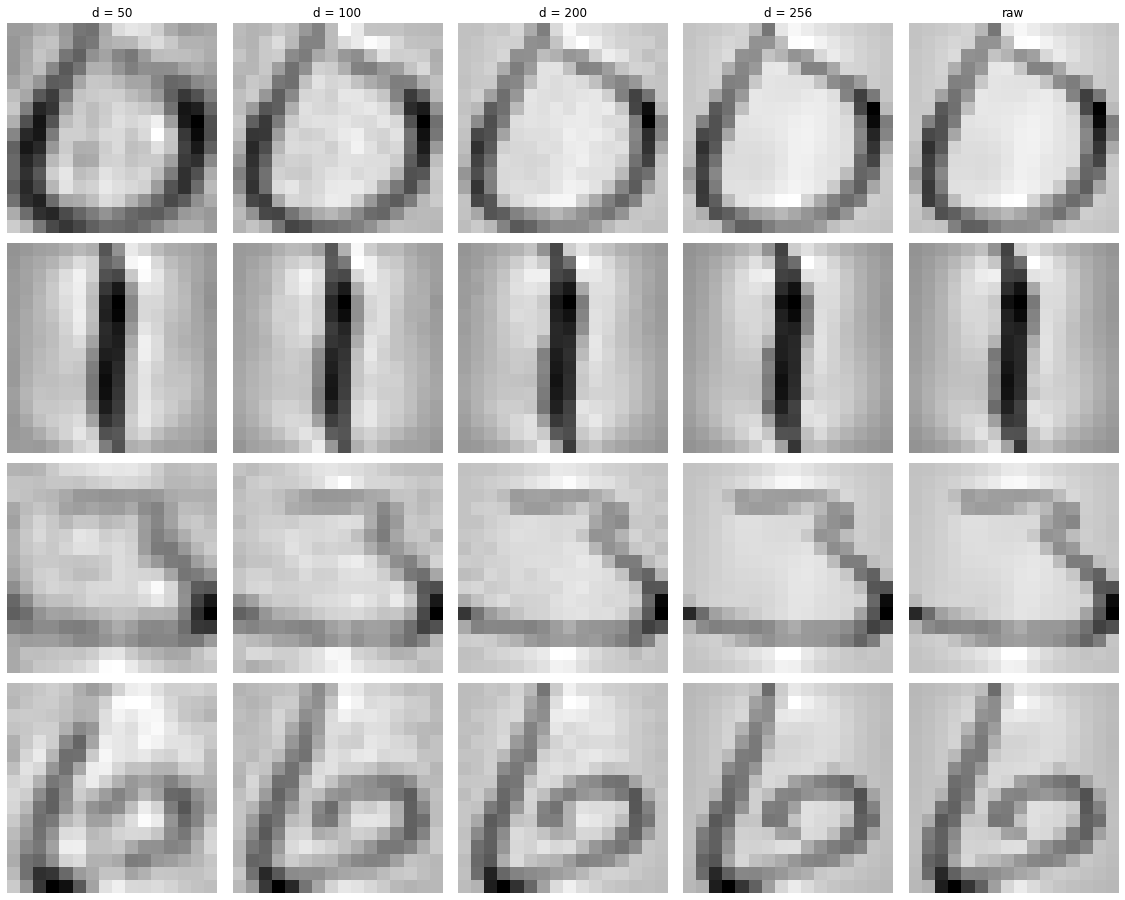

In [18]:
indices = [0, 500, 1000, 2000]
d = [50, 100, 200, 256]
fig, axs = plt.subplots(4, 5, gridspec_kw={'hspace': 0.05, 'wspace': 0.05}, figsize=(20, 16))
for i in range(4):
    axs[0, i].set_title('d = ' + str(d[i]))
axs[0, 4].set_title('raw')
for i, j in zip(indices, range(4)):
    axs[j, 0].imshow(np.reshape(recons50[i], (16, 16)), cmap='gray_r')
    axs[j, 1].imshow(np.reshape(recons100[i], (16, 16)), cmap='gray_r')
    axs[j, 2].imshow(np.reshape(recons200[i], (16, 16)), cmap='gray_r')
    axs[j, 3].imshow(np.reshape(recons256[i], (16, 16)), cmap='gray_r')
    axs[j, 4].imshow(np.reshape(dataN[i], (16, 16)), cmap='gray_r')
for ax in axs.flat:
    ax.set_axis_off()

**Comments:**
- The raw images and the images at d=256 are the same as the data is already 256 dimensional. 
- As d goes down the images seem more noisy but they are still recognizable even at d=50. 
- Some digits are more robust to distortion than others, for example the digit 1 does not get distorted as much as the digit 6.